In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cdf = pd.read_csv('D:/upgrad/EDA/eda-case-study/loan.csv',low_memory=False)

In [3]:
cdf.dropna(axis='columns',how='all',inplace=True)

In [4]:
cdf.drop(['desc','mths_since_last_delinq','mths_since_last_record', 'next_pymnt_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths','tax_liens'],axis='columns',inplace=True)

In [5]:
cdf = cdf.dropna(axis=0, subset=['revol_util','last_pymnt_d','last_credit_pull_d'])

In [6]:
cdf['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [7]:
cdf = cdf.apply(lambda x:x.fillna(x.value_counts().index[0]))

Check if there are any null or NaN values in any of the columns

In [8]:
round(100*(cdf.isnull().sum()/len(cdf.index)), 2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_

In [9]:
cdf.drop(['last_credit_pull_d','last_credit_pull_d','recoveries','collection_recovery_fee','issue_d','id','member_id'],axis='columns',inplace=True)

In [10]:
cdf_final = cdf[(cdf.loan_status=='Fully Paid') | (cdf.loan_status=='Charged Off')]

In [11]:
cdf_final.groupby('loan_status')['loan_status'].count()

loan_status
Charged Off     5543
Fully Paid     32915
Name: loan_status, dtype: int64

In [12]:
cdf_final['int_rate'] = cdf_final['int_rate'].apply(lambda x: float(x[:-1]))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
cdf_final.drop(['funded_amnt','funded_amnt_inv','url','last_pymnt_d','zip_code'],axis='columns',inplace=True)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
cdf_final['loan_status'] = cdf_final.loan_status.map({ 'Charged Off': 1, 'Fully Paid': 0})

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
# Removing title as it has lot of ad-hoc values
cdf_final.drop(['title'],axis='columns',inplace=True)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
cdf_final.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,...,5833.84,5000.00,863.16,0.00,171.62,1,INDIVIDUAL,0,0,0.0
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,119.66,1,INDIVIDUAL,0,0,0.0
2,2400,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,...,3005.67,2400.00,605.67,0.00,649.91,1,INDIVIDUAL,0,0,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,357.48,1,INDIVIDUAL,0,0,0.0
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,161.03,1,INDIVIDUAL,0,0,0.0


In [17]:
cols = cdf_final.columns
num_cols = cdf_final._get_numeric_data().columns
cat_variables = list(set(cols) - set(num_cols))
cat_variables

['addr_state',
 'emp_length',
 'term',
 'initial_list_status',
 'verification_status',
 'grade',
 'purpose',
 'sub_grade',
 'application_type',
 'earliest_cr_line',
 'pymnt_plan',
 'home_ownership',
 'emp_title',
 'revol_util']

In [18]:
num_vars = set(num_cols)
num_vars.remove('loan_status')
for variable in num_vars:
    cdf_final[variable] = (cdf_final[variable]-np.mean(cdf_final[variable]))/(np.max(cdf_final[variable])-np.min(cdf_final[variable]))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
cdf_final.drop(['policy_code','acc_now_delinq','delinq_amnt','out_prncp','out_prncp_inv'], inplace=True, axis=1)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
round(100*(cdf.isnull().sum()/len(cdf.index)), 2)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
pymnt_plan              0.0
url                     0.0
purpose                 0.0
title                   0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
out_prncp               0.0
out_prncp_inv           0.0
total_pymnt             0.0
total_pymnt_inv         0.0
total_rec_prncp         0.0
total_rec_int       

Use one-hot encoding to convert numerical columns with categorical data

In [21]:
for variable in cat_variables:
    dummies = pd.get_dummies(cdf_final[variable], prefix=variable, drop_first=True)
    cdf_final = pd.concat([cdf_final, dummies], axis=1)
    cdf_final.drop([variable], axis=1, inplace=True)

In [ ]:
ind_headers = list(cdf_final.columns.values)

In [ ]:
ind_headers.remove('loan_status')

In [ ]:
X = cdf_final[ind_headers]
y = cdf_final['loan_status']

Now we will build a random forrest classifier to predict whether a prospective customer is likely to default on his/her loan or not.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [26]:
 # Split dataset into train and test dataset
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                    train_size=0.7, random_state = 12)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
    # Train and Test dataset size details
    print("Train_x Shape :: ", train_x.shape)
    print("Train_y Shape :: ", train_y.shape)
    print("Test_x Shape :: ", test_x.shape)
    print("Test_y Shape :: ", test_y.shape)

Train_x Shape ::  (26920, 29687)
Train_y Shape ::  (26920,)
Test_x Shape ::  (11538, 29687)
Test_y Shape ::  (11538,)


In [24]:
""" 
Function that trains the given classifier on training data and comes up with prediction and accuracy score
for the test dataset

@Author Aryan Singh
"""
def train_model(clf, train_x,train_y,test_x,test_y):
    trained_model = clf.fit(train_x, train_y)
    print(trained_model)
    predictions_train = trained_model.predict(train_x)
    predictions = trained_model.predict(test_x)
    for i in range(0, 5):
        print("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))
    print("Train Accuracy :: ", accuracy_score(train_y, predictions_train))
    print("Test Accuracy  :: ", accuracy_score(test_y, predictions))
    print(" Confusion matrix for train dataset", confusion_matrix(train_y, predictions_train))
    print(" Confusion matrix for test dataset", confusion_matrix(test_y, predictions))
    return predictions

In [25]:
""" 
Function that takes in the predictions and labels of test dataset to determine the F-1 score,
sensitivity, specificity, recall and precision for the given dataset.

@Author Aryan Singh
"""
def measure_accuracy(test_y, predictions):
    confusion = confusion_matrix(test_y, predictions)

    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]

    sensitivity = TP/ (TP + FN)
    print("Sensitivity ", sensitivity)

    specificity = TN/(TN + FP)
    print("specificity", specificity)

    precision = TP / (TP + FP)
    print("pricision ", precision)
    print("Precision Score:",precision_score(test_y, predictions))

    print("Recall Score:", recall_score(test_y, predictions))

    print("F1 Score:", f1_score(test_y, predictions))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [32]:
print("########################Random Forest Classifier########################")
clf_A = RandomForestClassifier(n_estimators=20, random_state=100, n_jobs=4)
predictions = train_model(clf_A, train_x,train_y,test_x,test_y)
measure_accuracy(test_y, predictions)

########################Random Forest Classifier########################
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=4,
            oob_score=False, random_state=100, verbose=0, warm_start=False)
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Train Accuracy ::  0.9977711738484398
Test Accuracy  ::  0.9253770150806032
 Confusion matrix for train dataset [[23060     0]
 [   60  3800]]
 Confusion matrix for test dataset [[9848    7]
 [ 854  829]]
Sensitivity  0.49257278669043375
specificity 0.9992897006595637
pricision  0.99

In [34]:
print("########################Logistic Regression########################")
clf_B = LogisticRegression(random_state = 42, n_jobs=4)
predictions = train_model(clf_B, train_x,train_y,test_x,test_y)
measure_accuracy(test_y, predictions)

########################Logistic Regression########################


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Train Accuracy ::  0.9793462109955423
Test Accuracy  ::  0.9613451204714856
 Confusion matrix for train dataset [[23042    18]
 [  538  3322]]
 Confusion matrix for test dataset [[9837   18]
 [ 428 1255]]
Sensitivity  0.7456922162804516
specificity 0.9981735159817352
pricision  0.98586017282011
Precision Score: 0.98586017282011
Recall Score: 0.7456922162804516
F1 Score: 0.8491204330175913


In [35]:
print("########################SVM########################")
clf_C = LinearSVC(random_state = 42)
predictions = train_model(clf_C, train_x,train_y,test_x,test_y)
measure_accuracy(test_y, predictions)

########################SVM########################
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Train Accuracy ::  0.9991827637444279
Test Accuracy  ::  0.9759057028947825
 Confusion matrix for train dataset [[23060     0]
 [   22  3838]]
 Confusion matrix for test dataset [[9831   24]
 [ 254 1429]]
Sensitivity  0.8490790255496138
specificity 0.9975646879756469
pricision  0.9834824501032347
Precision Score: 0.9834824501032347
Recall Score: 0.8490790255496138
F1 Score: 0.9113520408163266


In [27]:
### Pre-Processing For gradient booster

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
cdf_final.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in cdf_final.columns.values]
ind_headers = list(cdf_final.columns.values)
ind_headers.remove('loan_status')
X = cdf_final[ind_headers]
y = cdf_final['loan_status']
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                    train_size=0.7, random_state = 12)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [28]:
print("########################Gradient Boost########################")
clf_D = xgb.XGBClassifier(seed = 82, nthread=4)
predictions = train_model(clf_D, train_x,train_y,test_x,test_y)
measure_accuracy(test_y, predictions)

########################Gradient Boost########################
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=82, silent=True,
       subsample=1)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Test Accuracy  ::  0.984919396775871
 Confusion matrix for test dataset [[9849    6]
 [ 168 1515]]
Sensitivity  0.9001782531194296
specificity 0.9993911719939117
pricision  0.9960552268244576
Precision Score: 0.9960552268244576
Recall Score: 0.9001782531194296
F1 Score: 0.9456928838951311


In [34]:
print("########################Gaussian Naive Bayes########################")
clf_E = GaussianNB()
predictions = train_model(clf_E, train_x,train_y,test_x,test_y)
measure_accuracy(test_y, predictions)

########################Gaussian Naive Bayes########################
GaussianNB(priors=None)
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 1
Train Accuracy ::  0.8731054977711739
Test Accuracy  ::  0.30221875541688337
 Confusion matrix for train dataset [[19644  3416]
 [    0  3860]]
 Confusion matrix for test dataset [[2046 7809]
 [ 242 1441]]
Sensitivity  0.8562091503267973
specificity 0.2076103500761035
pricision  0.1557837837837838
Precision Score: 0.1557837837837838
Recall Score: 0.8562091503267973
F1 Score: 0.2636055977316382


So after comparing all the models it is quite clear that the **Gradient Boosing** works the best as it has a **sensitivity** of over 90 percent which means that it identifies over **90 percent** of the defaulters correctly.

At the same time its **specificity** is almost **100 percent** that means it identifies the non defaulters with a high amount of accuracy as well.

## ROC Curve for the best model

Lets look at the ROC curve for the GBClassifier model

In [76]:
""" 
Function to plot the ROC curve

@Author Aryan Singh
"""
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def draw_roc(actual, prob):
    fpr, tpr, thresholds = roc_curve(actual, prob, drop_intermediate = False)
    auc_score = roc_auc_score(actual,prob)
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

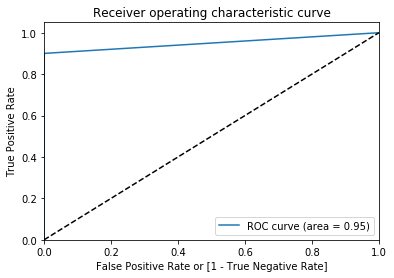

(array([0.00000000e+00, 6.08828006e-04, 1.00000000e+00]),
 array([0.        , 0.90017825, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [77]:
draw_roc(test_y, predictions_D)

# Checking Parameter Importance from model

In [45]:
clf_D.feature_importances_

array([3.44691115e-02, 2.51312591e-02, 3.96161282e-02, ...,
       6.58378661e-05, 1.27063879e-04, 1.24677401e-05])

In [34]:
cdf_no_ls = cdf_final.loc[:, cdf_final.columns != 'loan_status']

In [36]:
feature_importances  = pd.Series(clf_D.feature_importances_, index=cdf_no_ls.columns)

In [42]:
import matplotlib.pyplot as plt
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
    plt.figure(figsize=(14,8))
    plt.xlabel('feature_importance')
    results = pd.Series(feature_dict)
    results.sort_values(inplace=True)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))

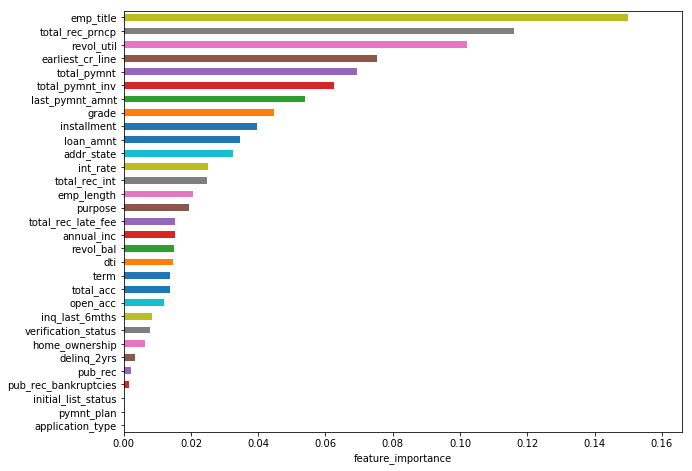

In [43]:
graph_feature_importances(clf_D, cdf_no_ls.columns, summarized_columns=cat_variables)